In [47]:
from pysentimiento import create_analyzer
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento.preprocessing import preprocess_tweet
import numpy as np

df = pd.read_csv("comentarios.csv")

In [38]:
#A favor del proyecto
titulo = 'usuarixs a favor del proyecto'
df = df[df['Bando'] != 'C']
df = df[df['Bando'] != 'N']

In [33]:
#En contra del proyecto
titulo = 'usuarixs en contra del proyecto'
df = df[df['Bando'] != 'A']
df = df[df['Bando'] != 'N']

In [ ]:
#Neutrales
titulo = 'usuarixs neutrales'
df = df[df['Bando'] != 'A']
df = df[df['Bando'] != 'C']

In [40]:
#Masculinos
titulo = 'usuarixs masculinos'
df = df[df['Género'] != 'X']
df = df[df['Género'] != 'F']

In [48]:
#Femeninos
titulo = 'usuarixs femeninos'

df = df[df['Género'] != 'X']
df = df[df['Género'] != 'M']


In [49]:
analyzer = create_analyzer(task="sentiment", lang="es")

def aplicar_analyzer(texto):
    resultado = analyzer.predict(texto)
    return {
        'POS': resultado.probas.get('POS', 0),  # Obtener la probabilidad de POS o 0 si no está presente
        'NEU': resultado.probas.get('NEU', 0),  # Obtener la probabilidad de NEU o 0 si no está presente
        'NEG': resultado.probas.get('NEG', 0)   # Obtener la probabilidad de NEG o 0 si no está presente
    }

def limpiar_comentario(comentario):
    return preprocess_tweet(comentario, lang="es")

df['post_limpio'] = df['post'].apply(limpiar_comentario)

df[['POS_proba', 'NEU_proba', 'NEG_proba']] = df['post_limpio'].apply(aplicar_analyzer).apply(pd.Series)

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


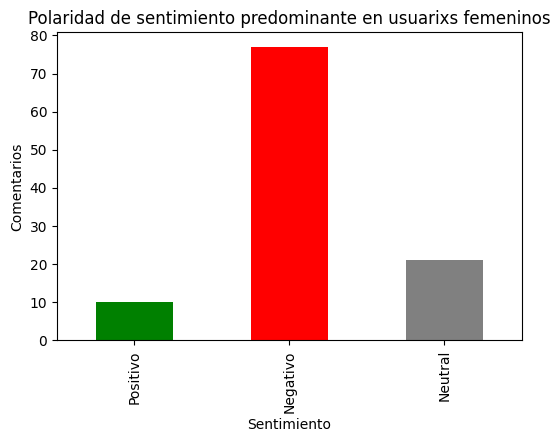

In [50]:

# Crear una nueva columna "sentimiento" con la clasificación para cada comentario
df['sentimiento'] = df[['POS_proba', 'NEU_proba', 'NEG_proba']].apply(lambda x: np.argmax(x), axis=1)

# Mapear los valores de índice a etiquetas de sentimiento (POS, NEU, NEG)
sentimiento_map = {0: 'Positivo', 1: 'Neutral', 2: 'Negativo'}
df['sentimiento'] = df['sentimiento'].map(sentimiento_map)
plt.figure(figsize=(6, 4))
df['sentimiento'].value_counts().loc[['Positivo', 'Negativo', 'Neutral']].plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Polaridad de sentimiento predominante en '+ titulo)
plt.xlabel('Sentimiento')
plt.ylabel('Comentarios')
plt.show()

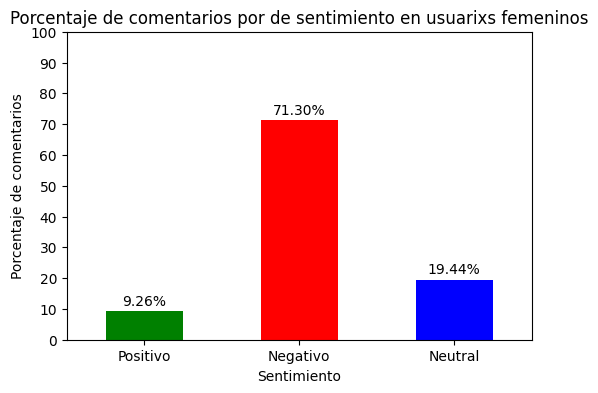

In [51]:

# Calcular el conteo de cada sentimiento y su porcentaje
sentimiento_counts = df['sentimiento'].value_counts(normalize=True) * 100

# Reordenar las categorías en el orden deseado
sentimiento_counts = sentimiento_counts.loc[['Positivo', 'Negativo', 'Neutral']]

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sentimiento_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Porcentaje de comentarios por de sentimiento en '+ titulo)
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje de comentarios')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 101, 10))  # Establecer los ticks del eje y en intervalos de 10

# Agregar etiquetas con los porcentajes
for i, v in enumerate(sentimiento_counts):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


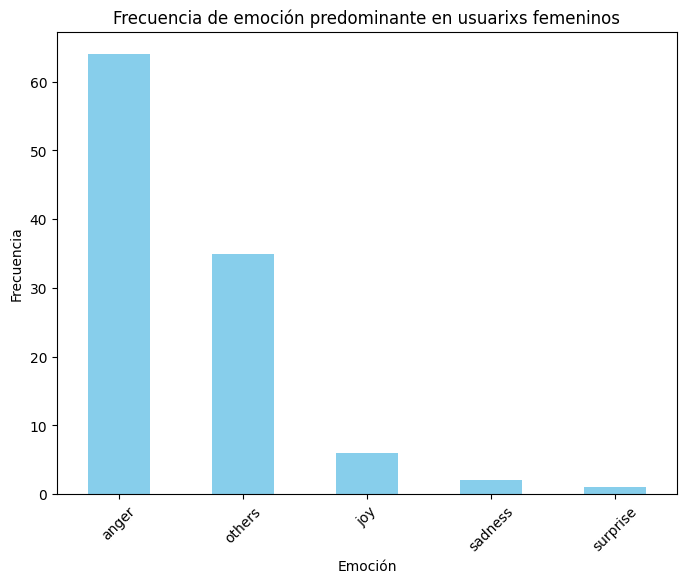

In [52]:
# EMOCIONES
def detectar_emociones(comentario):
    resultado = emotion_analyzer.predict(comentario)
    emocion = resultado.output
    probabilidad = resultado.probas.get(emocion, 0)  # Obtener la probabilidad de la emoción predominante
    return emocion, probabilidad

emotion_analyzer = create_analyzer(task="emotion", lang="es")

df[['emocion_predominante', 'probabilidad_emocion']] = df['post_limpio'].apply(detectar_emociones).apply(pd.Series)

# Graficar un gráfico de barras de la frecuencia de cada emoción predominante
plt.figure(figsize=(8, 6))
df['emocion_predominante'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de emoción predominante en '+ titulo)
plt.xlabel('Emoción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

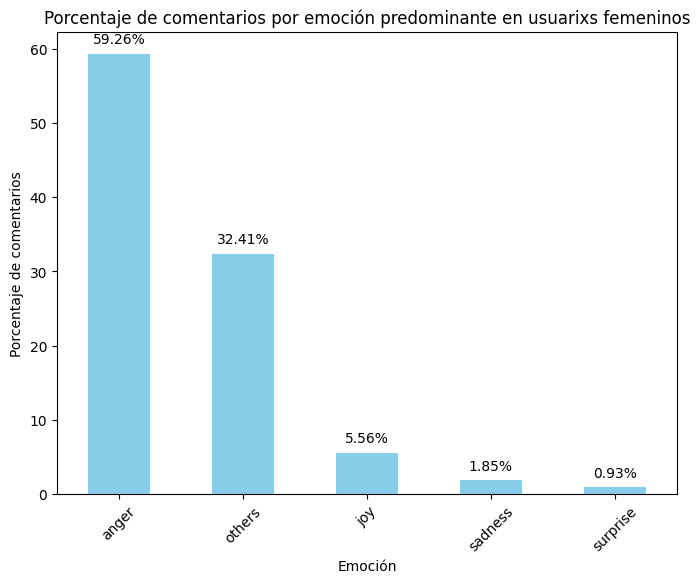

In [53]:
# Calcular el conteo de cada emoción y su porcentaje
emocion_counts = df['emocion_predominante'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
emocion_counts.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de comentarios por emoción predominante en '+ titulo)
plt.xlabel('Emoción')
plt.ylabel('Porcentaje de comentarios')
plt.xticks(rotation=45)

# Agregar etiquetas con los porcentajes
for i, v in enumerate(emocion_counts):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


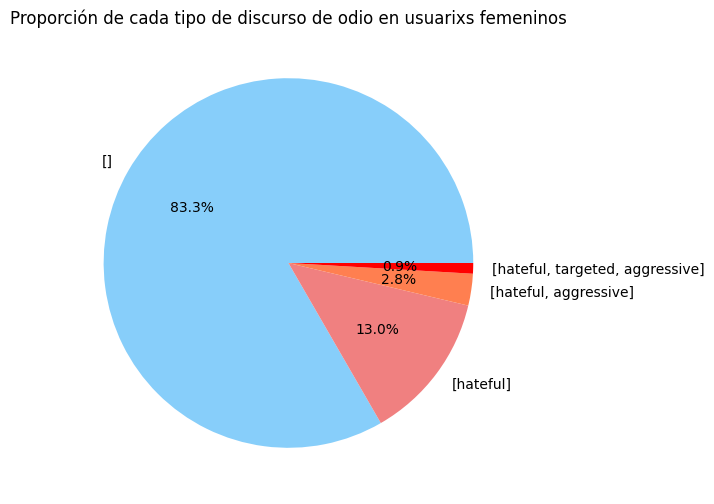

In [54]:
#DISCURSO DE ODIO
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

def detectar_discurso_odio(comentario):
    resultado = hate_speech_analyzer.predict(comentario)
    discurso_odio = resultado.output
    probabilidad = max(resultado.probas.values())  # Obtener la probabilidad más alta entre todas las categorías
    return discurso_odio, probabilidad

df[['discurso_odio', 'probabilidad_discurso_odio']] = df['post_limpio'].apply(detectar_discurso_odio).apply(pd.Series)

# Obtener la proporción de cada tipo de discurso de odio
proporciones_discurso_odio = df['discurso_odio'].value_counts(normalize=True)

# Graficar un gráfico de pastel de la proporción de cada tipo de discurso de odio
plt.figure(figsize=(6, 6))
proporciones_discurso_odio.plot(kind='pie', autopct='%1.1f%%', colors=['lightskyblue', 'lightcoral', 'coral', 'red'])
plt.title('Proporción de cada tipo de discurso de odio en ' + titulo)
plt.ylabel('')
plt.show()